In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import missingno as msno
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore') 



/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



# Read Data

In [2]:
data=pd.read_csv('../input/world-population-dataset/world_population.csv')
data.head(100)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,35,IRQ,Iraq,Baghdad,Asia,44496122,42556984,37757813,31264875,24628858,17658381,13653369,9811347,438317,101.5158,1.0221,0.56
96,125,IRL,Ireland,Dublin,Europe,5023109,4946119,4665760,4524585,3768950,3485374,3391387,2937637,70273,71.4799,1.0073,0.06
97,202,IMN,Isle of Man,Douglas,Europe,84519,84046,83593,83828,75562,68865,64022,55298,572,147.7605,1.0030,0.00
98,98,ISR,Israel,Jerusalem,Asia,9038309,8757489,8007778,7328445,6116958,4803254,3744608,2907307,20770,435.1617,1.0155,0.11


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [4]:
data.corr()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.000000,-0.358361,-0.355854,-0.351222,-0.347461,-0.341057,-0.336152,-0.335246,-0.335379,-0.383774,0.129436,-0.224561,-0.358464
2022 Population,-0.358361,1.000000,0.999946,0.999490,0.998629,0.994605,0.987228,0.980285,0.973162,0.453411,-0.027618,-0.020863,0.999999
2020 Population,-0.355854,0.999946,1.000000,0.999763,0.999105,0.995583,0.988724,0.982121,0.975254,0.454993,-0.027358,-0.025116,0.999944
2015 Population,-0.351222,0.999490,0.999763,1.000000,0.999783,0.997340,0.991594,0.985724,0.979414,0.458240,-0.026857,-0.032154,0.999487
2010 Population,-0.347461,0.998629,0.999105,0.999783,1.000000,0.998593,0.993929,0.988786,0.983042,0.461936,-0.026505,-0.037983,0.998626
2000 Population,-0.341057,0.994605,0.995583,0.997340,0.998593,1.000000,0.998336,0.995160,0.990956,0.473933,-0.026139,-0.050515,0.994598
1990 Population,-0.336152,0.987228,0.988724,0.991594,0.993929,0.998336,1.000000,0.999042,0.996602,0.486764,-0.026224,-0.062397,0.987218
1980 Population,-0.335246,0.980285,0.982121,0.985724,0.988786,0.995160,0.999042,1.000000,0.999194,0.498166,-0.026587,-0.072349,0.980273
1970 Population,-0.335379,0.973162,0.975254,0.979414,0.983042,0.990956,0.996602,0.999194,1.000000,0.509940,-0.026881,-0.081313,0.973150
Area (km²),-0.383774,0.453411,0.454993,0.458240,0.461936,0.473933,0.486764,0.498166,0.509940,1.000000,-0.063128,-0.013970,0.453284


In [5]:
data.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

##  ✔*İt Seems Data Clear*

# Explanation

*  Rank: Rank by Population.
*  CCA3: 3 Digit Country/Territories Code.
*  Country: Name of the Country/Territories.
*  Capital: Name of the Capital.
*  Continent: Name of the Continent.
*  2022 Population: Population of the Country/Territories in the year 2022.
*  2020 Population: Population of the Country/Territories in the year 2020.
*  2015 Population: Population of the Country/Territories in the year 2015.
*  2010 Population: Population of the Country/Territories in the year 2010.
*  2000 Population: Population of the Country/Territories in the year 2000.
*  1990 Population: Population of the Country/Territories in the year 1990.
*  1980 Population: Population of the Country/Territories in the year 1980.
*  1970 Population: Population of the Country/Territories in the year 1970.
*  Area (km²): Area size of the Country/Territories in square kilometer.
*  Density (per km²): Population Density per square kilometer.
*  Growth Rate: Population Growth Rate by Country/Territories.
*  World Population Percentage: The population percentage by each Country/Territories.


# Data Examination

In [6]:
data[['Rank','Country','2022 Population','Density (per km²)','Growth Rate','World Population Percentage']].sort_values(['Rank'])

,Rank,Country,2022 Population,Density (per km²),Growth Rate,World Population Percentage
41,1,China,1425887337,146.8933,1.0000,17.88
92,2,India,1417173173,431.0675,1.0068,17.77
221,3,United States,338289857,36.0935,1.0038,4.24
93,4,Indonesia,275501339,144.6529,1.0064,3.45
156,5,Pakistan,235824862,267.4018,1.0191,2.96
...,...,...,...,...,...,...
137,230,Montserrat,4390,43.0392,0.9939,0.00
64,231,Falkland Islands,3780,0.3105,1.0043,0.00
150,232,Niue,1934,7.4385,0.9985,0.00
209,233,Tokelau,1871,155.9167,1.0119,0.00


In [7]:
data[['Rank','Country','2022 Population','2020 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']].sort_values(['Rank'])

,Rank,Country,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
41,1,China,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450
92,2,India,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301
221,3,United States,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340
93,4,Indonesia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394
156,5,Pakistan,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872
...,...,...,...,...,...,...,...,...,...,...
137,230,Montserrat,4390,4500,5059,4938,5138,10805,11452,11402
64,231,Falkland Islands,3780,3747,3408,3187,3080,2332,2240,2274
150,232,Niue,1934,1942,1847,1812,2074,2533,3637,5185
209,233,Tokelau,1871,1827,1454,1367,1666,1669,1647,1714


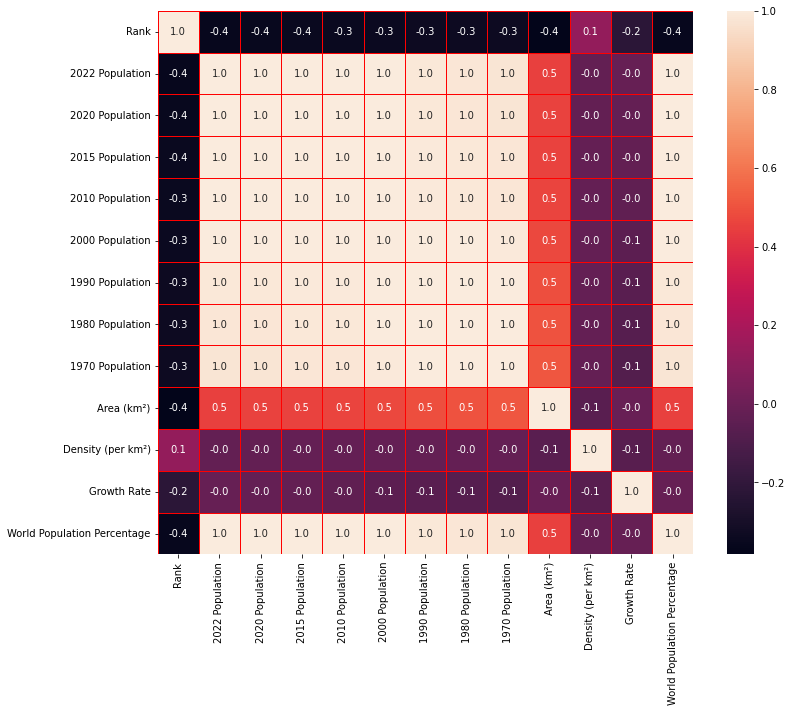

In [8]:
f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

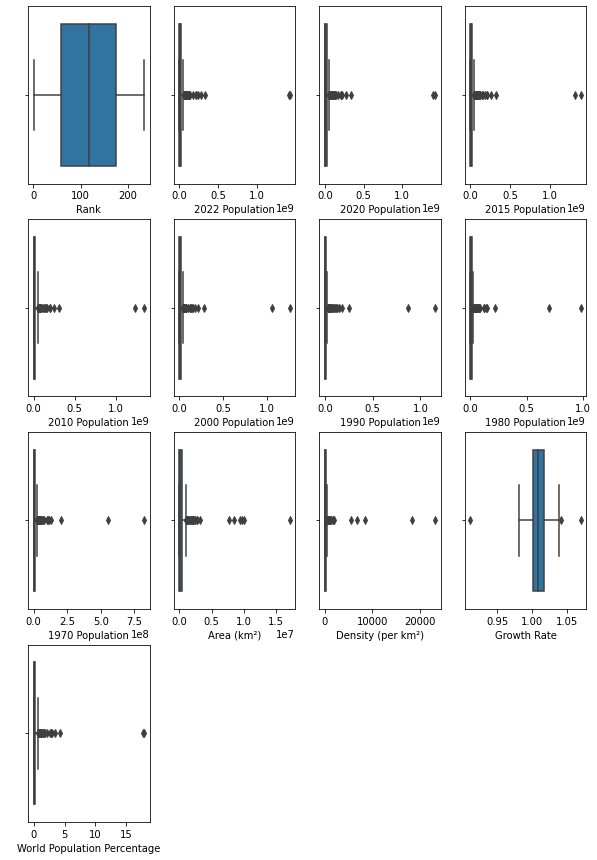

In [9]:
plt.figure(figsize=(10,15))

col=data.select_dtypes(include=np.number).columns
for i in range(len(col)):
        
    plt.subplot(4,4,i+1)
    
    sns.boxplot(x=data[col[i]])
       
    plt.xlabel(col[i].replace('_'," "))
    plt.ylabel(' ')

# Visualization

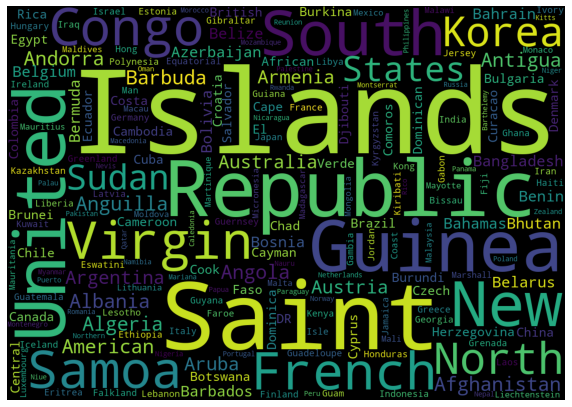

In [10]:
# word cloud for Publishers
plt.subplots(figsize=(10,15))
wordcloud=WordCloud(background_color="black",
                    width=1112,
                    height=784).generate(' '.join(data.Country))
plt.imshow(wordcloud)
plt.axis("off")

plt.savefig('graph.png')
plt.show()

In [11]:

df=data[['Rank','Country','1970 Population','1980 Population','1990 Population','2000 Population','2010 Population','2015 Population','2020 Population','2022 Population']].sort_values(['Rank']).head(20)

df=df.set_axis(['Rank', 'Country', '1970', '1980','1990','2000','2010','2015','2020','2022'], axis=1, inplace=False)

df_2=pd.melt(df,id_vars=['Rank','Country'],value_vars=['1970', '1980','1990','2000','2010','2015','2020','2022'],var_name='Year',value_name='Population')

## Top 20 Country Population With Years

In [12]:
fig = px.bar(df_2, x="Country", y="Population", color="Country",
  animation_frame="Year", animation_group="Country", range_y=[0,2000000000])
fig.show()

### ❗❗ to be continued